# Bayesian PCA Experiments 

In [1]:
import bayespca as bpca
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris,load_breast_cancer,load_wine

In [2]:
# Loading data
data = load_iris()
X,y= data['data'],data['target']

In [3]:
print(f"The Data has {X.shape[1]} features")

The Data has 4 features


## PCA And Probabilistic PCA

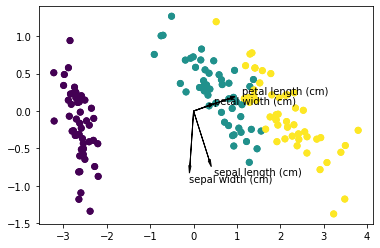

In [4]:
## Original PCA
pca = bpca.PCA(2,method='cov')
Xt = pca.fit_transform(X)

# Plot
plt.scatter(Xt[:,0],Xt[:,1],c=y)

bpca.utils.plot_eigenvec(Xt,pca.eigen_vec,y,data["feature_names"]) # Plot angles of features on the latent space

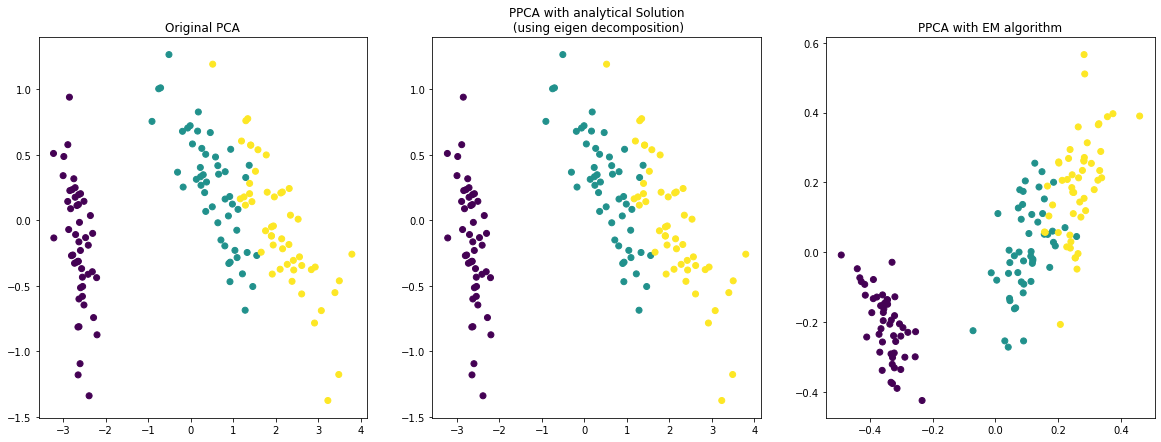

In [5]:
## Probabilistic PCA
ppca = bpca.ProbabilisticPCA(2)
Xpt = pca.fit_transform(X)

ppca_em =  bpca.ProbabilisticPCA(2,method="em")
Xpt_em = ppca_em.fit_transform(X)

# Plot
fig,ax = plt.subplots(1,3,figsize=(20,7))
ax[0].scatter(Xt[:,0],Xt[:,1],c=y)
ax[0].set_title("Original PCA")

ax[1].scatter(Xpt[:,0],Xpt[:,1],c=y)
ax[1].set_title("PPCA with analytical Solution\n (using eigen decomposition)")

ax[2].scatter(Xpt_em[:,0],Xpt_em[:,1],c=y)
ax[2].set_title("PPCA with EM algorithm")

plt.show()

-> same transformation

For EM approx so similar but not exactly the same

## Bayesian PCA

In [4]:
bayes = bpca.BayesianPCA()
Xb = bayes.fit_transform(X)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


### Hinton diagrams

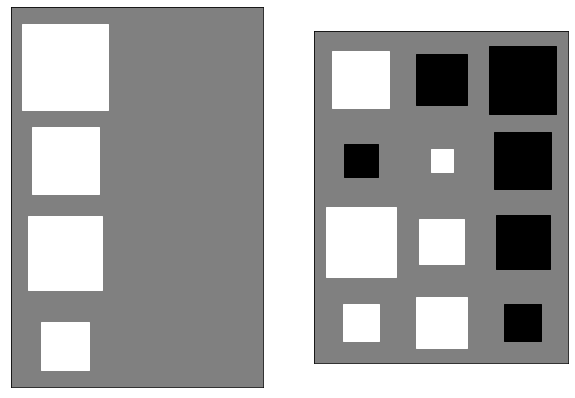

In [13]:
## PPCA with q = d-1
ppca_qmax  = bpca.ProbabilisticPCA(3,method="em")
ppca_qmax.fit(X)

#Plot
fig,ax = plt.subplots(1,2,figsize=(10,7))

bpca.utils.hinton(bayes.W.T,ax=ax[0])
bpca.utils.hinton(ppca_qmax.W.T,ax=ax[1])

In [21]:
print(f"The number of effective dimension is qeff = {bayes.qeff}")

The number of effective dimension is qeff = 1


-> Bayesian PCA shuts off 2 latent space dimensions on the contrary of the probabilistic one which uses fully  the number dimension that was specified.

## Kernel PCA

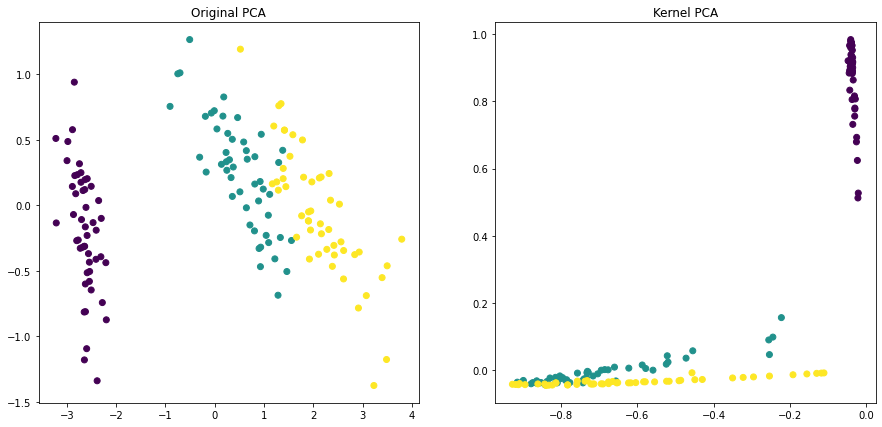

In [8]:
kernel =  bpca.KernelPCA(2)
Xk  = kernel.fit_transform(X)

#Plot
fig,ax = plt.subplots(1,2,figsize=(15,7))

ax[0].scatter(Xt[:,0],Xt[:,1],c=y)
ax[0].set_title("Original PCA")

ax[1].scatter(Xk[:,0],Xk[:,1],c=y)
ax[1].set_title("Kernel PCA")

plt.show()

### Probabilistic Kernel PCA

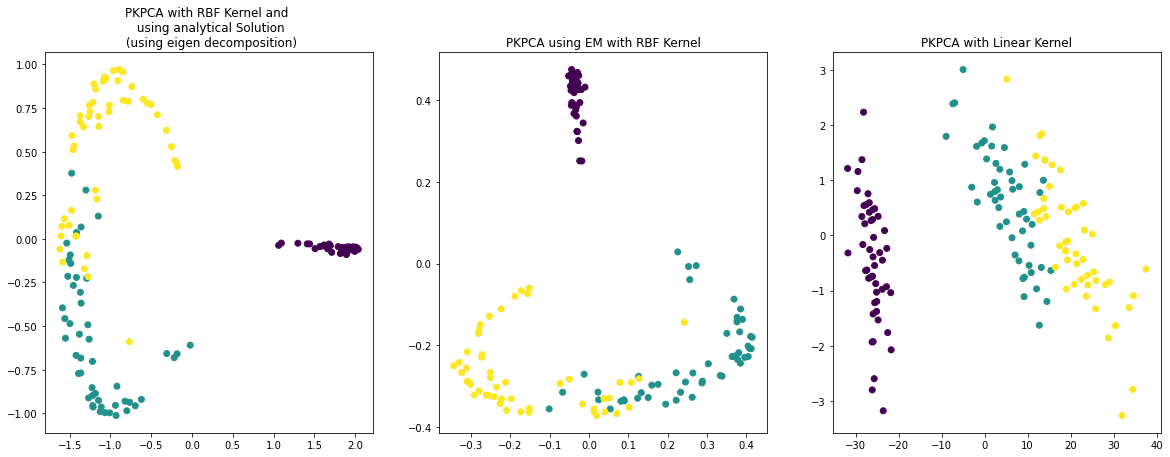

In [4]:
pkpca = bpca.ProbabilisticKernelPCA(2,kernel=bpca.kernels.RBF())
pkpca_em = bpca.ProbabilisticKernelPCA(2,kernel=bpca.kernels.RBF(),method="em")
pkpca_linear = bpca.ProbabilisticKernelPCA(2,kernel=bpca.kernels.Linear())

xpk = pkpca.fit_transform(X)
xpk_em = pkpca_em.fit_transform(X)
xpk_linear = pkpca_linear.fit_transform(X)

# Plot
fig,ax = plt.subplots(1,3,figsize=(20,7))
ax[0].scatter(xpk[:,0],xpk[:,1],c=y)
ax[0].set_title("PKPCA with RBF Kernel and \n using analytical Solution\n (using eigen decomposition)")


ax[1].scatter(xpk_em[:,0],xpk_em[:,1],c=y)
ax[1].set_title("PKPCA using EM with RBF Kernel")


ax[2].scatter(xpk_linear[:,0],xpk_linear[:,1],c=y)
ax[2].set_title("PKPCA with Linear Kernel")

plt.show()

### Bayesian Kernel PCA

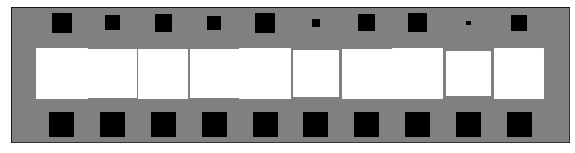

In [28]:
b = bpca.BayesianKernelPCA()
b.fit(X)

fig,ax = plt.subplots(1,1,figsize=(10,7))
bpca.utils.hinton(b.W[:10],ax=ax)
plt.show()

In [30]:
print(f"The number of effective dimension is qeff = {b.qeff}")

The number of effective dimension is qeff = 1
